In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/combined_csv.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

In [5]:
df.iloc[:, 3:16].head()

,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal
0,28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,NaN,1.000000,28000.0
1,1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.000000,1000.0
2,22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.000000,15000.0
3,165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,1489425776,False,NaN,1.308394,10000.0
4,2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,1357763527,False,NaN,1.000000,2800.0


 ## Columns

 * double click for better view

 <br>
 
 0   backers_count             number of backers 
 1   blurb                     short description 
 2   category                  Kickstarter categories 
 3   converted_pledged_amount  pledged amount in USD  
 4   country                   country 
 5   created_at                creation date/time?  
 6   creator                   Kickstarter account that created the project 
 7   currency                  currency the project asks for
 8   currency_symbol           currency symbol 
 9   currency_trailing_code    ?   
 10  current_currency          ?
 11  deadline                  deadline date/time?
 12  disable_communication     don't allow communication/comments   
 13  friends                   drop (not enough data) 
 14  fx_rate                   currency conversion rate
 15  goal                      fixed amount required for funding
 16  id                        Kickstarter project id  
 17  is_backing                drop (not enough data)  
 18  is_starrable              ?  
 19  is_starred                drop (not enough data)  
 20  launched_at               launch date/time?  
 21  location                  location
 22  name                      project name 
 23  permissions               drop (not enough data) 
 24  photo                     maybe drop?
 25  pledged                   pledged amount in original currency
 26  profile                   drop? 
 27  slug                      drop (converted project name) 
 28  source_url                source url - drop 
 29  spotlight                 drop? (probably not influencable by the creators)   
 30  staff_pick                drop? (probably not influencable by the creators)   
 31  state                     !!!!!target!!!!! 
 32  state_changed_at          state changed at date/time?  
 33  static_usd_rate           conversion rate -> drop
 34  urls                      drop 
 35  usd_pledged               drop
 36  usd_type                  drop

In [6]:
df['current_currency'].unique()

array(['USD', 'CAD', 'AUD', 'GBP', 'EUR'], dtype=object)

In [7]:
no_comm = df[df['disable_communication'] == True]

In [8]:
len(no_comm)

623

In [9]:
comm = df[df['disable_communication'] == False]

In [10]:
len(comm)

208599

### location example

{"id":2379574,
"name":"Chicago",
"slug":"chicago-il",
"short_name":"Chicago, IL",
"displayable_name":"Chicago, IL",
"localized_name":"Chicago",
"country":"US",
"state":"IL",
"type":"Town",
"is_root":false,
"urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/chicago-il","location":"https://www.kickstarter.com/locations/chicago-il"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1552595044.c1041c6bca69b0b72738f3b9504ebf921b3e5e0e&woe_id=2379574"}}}'

In [ ]:
df['category'].unique()

### category example

{"id":43,
"name":"Rock",
"slug":"music/rock",
"position":17,
"parent_id":14,
"color":10878931,
"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/music/rock"}}}'

In [ ]:
df['creator'].unique()

### creator example

{"id":1495925645,
"name":"Daniel",
"is_registered":null,
"chosen_currency":null,
"avatar":{"thumb":"https://ksr-ugc.imgix.net/assets/006/041/047/c44d1a95c2139ae46af635c7c6e7ea76_original.jpg?ixlib=rb-1.1.0&w=40&h=40&fit=crop&v=1461362658&auto=format&frame=1&q=92&s=3d655afafac9dbb59c1e675adfa87082","small":"https://ksr-ugc.imgix.net/assets/006/041/047/c44d1a95c2139ae46af635c7c6e7ea76_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1461362658&auto=format&frame=1&q=92&s=3973d24f5c3db1ed1d5c84cec8af1d6d","medium":"https://ksr-ugc.imgix.net/assets/006/041/047/c44d1a95c2139ae46af635c7c6e7ea76_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1461362658&auto=format&frame=1&q=92&s=3973d24f5c3db1ed1d5c84cec8af1d6d"},"urls":{"web":{"user":"https://www.kickstarter.com/profile/1495925645"},"api":{"user":"https://api.kickstarter.com/v1/users/1495925645?signature=1552621462.382152be8688b069cea0ab5f3a266a1530d83c3f"}}}',

In [12]:
df['photo'].isna().sum()

0

In [ ]:
df['profile'].unique()

### profile example

{"id":822687,
"project_id":822687,
"state":"inactive",
"state_changed_at":1425915845,
"name":null,
"blurb":null,
"background_color":null,
"text_color":null,
"link_background_color":null,
"link_text_color":null,
"link_text":null,
"link_url":null,
"show_feature_image":false,
"background_image_opacity":0.8,
"should_show_feature_image_section":true,
"feature_image_attributes":{"image_urls":{"default":"https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=90c72b785ef97539099dffb8531dcad3","baseball_card":"https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=883b3ff098e5fc4cf6fec280665f5fd0"}}}'

## list of features we keep

 1   blurb                     short description 
 2   category                  Kickstarter categories  
 4   country                   country 
 5   created_at                creation date/time?  
 7   currency                  currency the project asks for
 10  current_currency          ?
 11  deadline                  deadline date/time?
 12  disable_communication     don't allow communication/comments  
|14  fx_rate                   currency conversion rate 
 15  goal                      fixed amount required for funding (convert with fx_rate)
 18  is_starrable              ?  
 20  launched_at               launch date/time?  
 21  location                  location
 22  name                      project name 
 24  photo                     -> check if projects without photo
 31  state                     !!!!!target!!!!! 

## stakeholder

* who? - people/creators who are considering launching a project on Kickstarter
* why? - to find out if it's worth investing the time/money in creating materials/launching a project and which criteria to consider in order to make it successful
* metric? - f_beta (probably imbalanced data)
* model: classifier (binary)


# EDA - Round 1

In [14]:
# load data

df = pd.read_csv("data/combined_csv.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

In [15]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,...,babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,...,the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,...,record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,...,the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,...,help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.000000,domestic


In [16]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [17]:
# drop columns we won't be using

df = df[['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'is_starrable', 'launched_at', 'location',
       'name', 'photo', 'spotlight', 'staff_pick', 'state']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   currency                  209222 non-null  object 
 7   deadline                  209222 non-null  int64  
 8   disable_communication     209222 non-null  bool   
 9   fx_rate                   209222 non-null  float64
 10  goal                      209222 non-null  float64
 11  is_starrable              209222 non-null  bool   
 12  launched_at               209222 non-null  int64  
 13  location                  208996 non-null  o

### Missing Values

* location has 20 missing values (out of 18937)
* blurb has 1 missing value (out of 18937)

In [ ]:
#sns.pairplot(df)

In [18]:
df['state'].unique()

array(['live', 'successful', 'failed', 'canceled', 'suspended'],
      dtype=object)

In [19]:
live = df.query('state == "live"')
len(live)

7311

In [20]:
canceled = df.query('state == "canceled"')
len(canceled)

8624

In [21]:
suspended = df.query('state == "suspended"')
len(suspended)

623

In [22]:
successful = df.query('state == "successful"')
len(successful)

117465

In [23]:
failed = df.query('state == "failed"')
len(failed)

75199

In [24]:
# convert 'state' to numerical
# successful: 1
# failed: 0
# drop: live, suspended, canceled

df = df.query('state != "live"')
df = df.query('state != "suspended"')
df = df.query('state != "canceled"')
print(df['state'].unique()) # check that 'state' only contains failed and successful

df['state'].replace({'failed':0, 'successful':1}, inplace=True)
print(df['state'].unique()) # check that 'state' only contains 1 and 0


['successful' 'failed']
[1 0]


<AxesSubplot:xlabel='state', ylabel='count'>

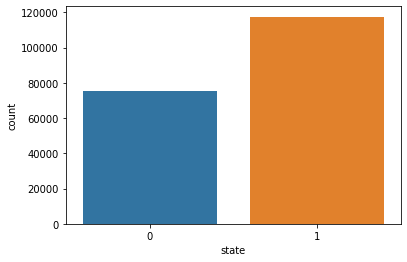

In [25]:
# plot frequency of success and failure

sns.countplot(x='state', data=df)


